# LetsGrowMore Beginner Level Task - 2

### Deep Learning - Stock Market Prediction And Forecasting Using Stacked LSTM 

Dataset Provided - https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

#### STACKED LSTM (Long Short Term Memory)

A Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points, but also entire sequences of data. LSTMs are widely used for sequence prediction problems and is proven to be extremely effective. The reason they work so well is that LSTM can store past important information and forget the information that is not.

### 1) Importing The Required Libraries

In [39]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### 2) Importing The Dataset

In [40]:
dataset = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [41]:
dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


### 3) Exploratory Analysis Of The Dataset

In [42]:
type(dataset)

pandas.core.frame.DataFrame

In [43]:
dataset.shape

(2035, 8)

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [45]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [46]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [47]:
dataset.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [48]:
dataset.sample(8)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1460,2012-11-02,160.50,161.85,157.55,158.70,158.30,2650292,4224.18
1258,2013-08-26,147.00,147.50,143.10,144.70,144.05,1772634,2567.36
176,2018-01-11,314.00,316.70,311.80,313.10,313.30,3481728,10911.99
1582,2012-05-10,111.10,113.25,110.85,112.70,112.45,1189412,1337.07
1437,2012-12-07,168.40,172.20,165.85,169.85,169.85,6204240,10543.05
1300,2013-06-25,133.45,135.45,132.20,134.05,133.90,1516124,2030.31
296,2017-07-20,175.40,176.25,170.30,171.00,171.30,2791324,4827.35
1984,2010-09-30,122.30,122.70,119.15,121.05,120.20,1240038,1495.40


In [49]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


### 4) Data Cleaning

Checking For Null Values In The Dataset (If any)

In [50]:
dataset.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [51]:
dataset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [52]:
dataset.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

### 5) Selecting A Particular Column From The Dataset For Price Prediction

Here, we choose the column 'High' from the dataset for predicting the future stock price 

In [168]:
dataset_new = dataset.reset_index()['High']
dataset_new

0       235.95
1       236.80
2       240.00
3       236.75
4       239.20
         ...  
2030    119.50
2031    121.00
2032    121.95
2033    122.00
2034    123.00
Name: High, Length: 2035, dtype: float64

Visualizing The 'High' Column Data Graph

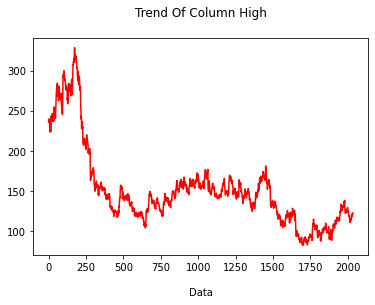

In [169]:
plt.plot(dataset_new, color='red')
plt.title('Trend Of Column High\n')
plt.xlabel('\nData')
plt.show()

### 6) Feature Scaling

Scaling the features makes the flow of gradient descent smooth and helps algorithms quickly reach the minima of the cost function. Without scaling features, the algorithm may be biased towards the feature which has values higher in magnitude.

Here, we apply MinMax Scaler as the LSTM ML Algorithm is sensitive to the scale of the data.

In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
sc = MinMaxScaler(feature_range = (0, 1))
dataset_new1 =sc.fit_transform(np.array(dataset_new).reshape(-1,1))

DATA BEFORE PERFORMING FEATURE EXTRACTION

In [138]:
dataset_new

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

DATA AFTER PERFORMING FEATURE EXTRACTION

In [139]:
dataset_new1

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

### 7) Preprocessing The Data

#### Splitting The Data Into Train & Test Set

In [186]:
train_set = int(len(dataset_new1)*0.65)
test_set = len(dataset_new1)-train_set

In [187]:
train_set, test_set

(1322, 713)

In [198]:
trainset = dataset_new1[0:train_set,:]
testset = dataset_new1[train_set:len(dataset_new1),:1]

In [199]:
trainset

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.26094891],
       [0.25547445],
       [0.24553933]])

In [200]:
testset

array([[0.23540146],
       [0.24493106],
       [0.25790754],
       [0.25831306],
       [0.26297648],
       [0.25304136],
       [0.26520681],
       [0.24493106],
       [0.26317924],
       [0.2676399 ],
       [0.26520681],
       [0.2714923 ],
       [0.28669911],
       [0.27534469],
       [0.27027575],
       [0.26966748],
       [0.27838605],
       [0.26642336],
       [0.25912409],
       [0.24290349],
       [0.2242498 ],
       [0.23215734],
       [0.24412003],
       [0.23479319],
       [0.22992701],
       [0.21532847],
       [0.20437956],
       [0.2027575 ],
       [0.19890511],
       [0.20519059],
       [0.20174371],
       [0.21248986],
       [0.1865369 ],
       [0.18207624],
       [0.19424169],
       [0.21816707],
       [0.20235199],
       [0.19221411],
       [0.17437145],
       [0.1703163 ],
       [0.18734793],
       [0.17802109],
       [0.19241687],
       [0.1946472 ],
       [0.2027575 ],
       [0.21046229],
       [0.21593674],
       [0.214

Converting the array of values to create a dataset matrix with time-step = 1 and output 1

In [210]:
def dataset_matrix(data, timestep = 1):
    x_data, y_data = [], []
    for i in range(len(data)-timestep-1):
        var1 = data[i:(i+timestep), 0] 
        x_data.append(var1)
        y_data.append(data[i + timestep, 0])
    return np.array(x_data), np.array(y_data)

Now, we assign a timestep value according to our wish, as we reshape 'X' according to the time stamp to predict 'Y' value

In [211]:
timestep = 150
xtrain, ytrain = dataset_matrix(trainset, timestep)
xtest, ytest = dataset_matrix(testset, timestep)

Now, we check for the dimension of the data separated before

In [212]:
print(xtrain.shape), print(ytrain.shape)

(1171, 150)
(1171,)


(None, None)

In [213]:
print(xtest.shape), print(ytest.shape)

(562, 150)
(562,)


(None, None)

We, reshape the train and test data for further working with the ML model

In [215]:
xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1], 1)

Firstly, we install tensorflow module to work with it

In [95]:
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=4c08807d9cc5d54fd974266ef4cfffc4277a23997a7eb2a84e3f66881c5162bf
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


### 8) Creating A Stacked LSTM Model 

We use the following libraries to create Stacked LSTM ML Model

In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [218]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [219]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 150, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 150, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### 9) Training The Model To Predict The Output

In [220]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100, batch_size=64, verbose=1)

Epoch 1/100
19/19 [==============================] - 20s 608ms/step - loss: 0.0139 - val_loss: 0.0057
Epoch 2/100
19/19 [==============================] - 9s 474ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 3/100
19/19 [==============================] - 9s 480ms/step - loss: 0.0018 - val_loss: 9.4071e-04
Epoch 4/100
19/19 [==============================] - 9s 486ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/100
19/19 [==============================] - 9s 470ms/step - loss: 0.0014 - val_loss: 8.4073e-04
Epoch 6/100
19/19 [==============================] - 9s 475ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/100
19/19 [==============================] - 9s 488ms/step - loss: 0.0013 - val_loss: 9.8768e-04
Epoch 8/100
19/19 [==============================] - 9s 483ms/step - loss: 0.0012 - val_loss: 9.9921e-04
Epoch 9/100
19/19 [==============================] - 9s 485ms/step - loss: 0.0011 - val_loss: 8.3697e-04
Epoch 10/100
19/19 [==============================] - 9s 491ms/step - 

In [221]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [222]:
trainpred

array([[0.73820084],
       [0.7539499 ],
       [0.78717566],
       ...,
       [0.26380947],
       [0.25243014],
       [0.25090042]], dtype=float32)

In [223]:
testpred

array([[0.323636  ],
       [0.31740966],
       [0.3170305 ],
       [0.31388223],
       [0.30275106],
       [0.29376724],
       [0.2929475 ],
       [0.28220215],
       [0.28403926],
       [0.29236412],
       [0.28158632],
       [0.26083753],
       [0.2264967 ],
       [0.20566957],
       [0.19565772],
       [0.19268952],
       [0.19611533],
       [0.19424243],
       [0.19434796],
       [0.19230148],
       [0.2023924 ],
       [0.20975566],
       [0.2135002 ],
       [0.21650356],
       [0.21132074],
       [0.21671568],
       [0.22069572],
       [0.22483176],
       [0.22169393],
       [0.21158789],
       [0.2034629 ],
       [0.20049849],
       [0.19867337],
       [0.18703747],
       [0.18494134],
       [0.19005752],
       [0.1939564 ],
       [0.20017344],
       [0.20468254],
       [0.20683458],
       [0.2122828 ],
       [0.2133049 ],
       [0.21245416],
       [0.21490036],
       [0.21156943],
       [0.20412862],
       [0.19640818],
       [0.191

In [224]:
train_pred = sc.inverse_transform(trainpred)
test_pred = sc.inverse_transform(testpred)

In [225]:
train_pred

array([[263.14032],
       [267.02405],
       [275.21753],
       ...,
       [146.15541],
       [143.34927],
       [142.97205]], dtype=float32)

In [226]:
test_pred

array([[160.90865 ],
       [159.37321 ],
       [159.27972 ],
       [158.50336 ],
       [155.75842 ],
       [153.543   ],
       [153.34085 ],
       [150.69104 ],
       [151.14409 ],
       [153.19699 ],
       [150.53918 ],
       [145.42253 ],
       [136.95409 ],
       [131.81812 ],
       [129.3492  ],
       [128.61725 ],
       [129.46204 ],
       [129.00018 ],
       [129.02621 ],
       [128.52155 ],
       [131.00996 ],
       [132.82574 ],
       [133.74915 ],
       [134.48978 ],
       [133.2117  ],
       [134.5421  ],
       [135.52357 ],
       [136.54352 ],
       [135.76973 ],
       [133.27759 ],
       [131.27396 ],
       [130.54292 ],
       [130.09285 ],
       [127.22344 ],
       [126.70654 ],
       [127.968185],
       [128.92964 ],
       [130.46277 ],
       [131.57472 ],
       [132.10541 ],
       [133.44893 ],
       [133.70099 ],
       [133.4912  ],
       [134.09444 ],
       [133.27303 ],
       [131.43813 ],
       [129.53426 ],
       [128.3

In [227]:
import math
from sklearn.metrics import mean_squared_error

Checking The Value Of Train Data

In [228]:
math.sqrt(mean_squared_error(ytrain,train_pred))

158.60108352688854

Checking The Value Of Test Data

In [229]:
math.sqrt(mean_squared_error(ytest,test_pred))

110.4392836093656

### 10) Visualizing the Output Graph

Now, we make use of both the train and test data that were earlier trained by the model, to visualize the output graph curve to analyse the predictions

Train & Test Predictions

In [230]:
var2 =150

train_pred_plot = np.empty_like(dataset_new1)
train_pred_plot[:, :] = np.nan
train_pred_plot[var2:len(trainpred) + var2, :] = train_pred

test_pred_plot = np.empty_like(dataset_new1)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(trainpred)+(var2*2)+1:len(dataset_new1)-1, :] = test_pred

Plotting the graph for predictions

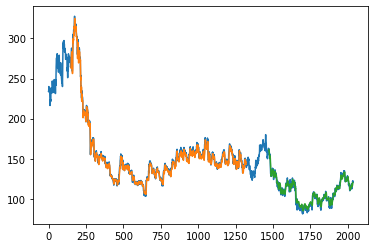

In [231]:
plt.plot(sc.inverse_transform(dataset_new1))
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)
plt.show()

INFERENCE - The blue color in the graph represents the whole data, while the orange depicts the train data and green depicts the predicted test data curve

## Conclusion

We were able to successfully predict the stock price of the 'High' column in the dataset using the Stacked LSTM Deep Learning ML Algorithm using various libraries and functions.